<a href="https://colab.research.google.com/github/smomtahe/Regression/blob/main/AnalyticalMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the lobraries
import numpy as np
import pandas as pd
import tensorflow as tf
# for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot

%matplotlib inline
from io import StringIO
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
#libraries for analytical model
from numpy import array
from numpy.linalg import inv
from numpy.linalg import qr
#libraries for selecting the best degree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#klearn.datasets is used to generate synthetic datasets for regressoion
import sklearn.datasets as dt
# for generating data from a dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
#import plotly_express as px
#plot surface
import os
from mpl_toolkits import mplot3d
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv("https://raw.githubusercontent.com/smomtahe/heightweight/main/heightweight.csv")


In [ ]:
def generate_data():  # generated data for 20 points
    X = 2 * np.random.rand(20, 1)
    y = 4 + 3 * X + np.random.randn(20, 1)  # y = 4 + 3X + Gaussian noise  # theta_0 or Bias = 4 and theta_1 = 3
    return X, y
#generate_data()

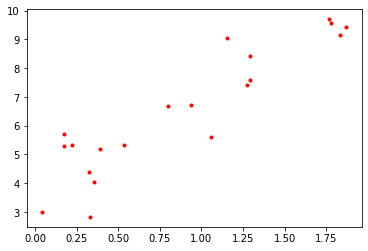

In [ ]:
X, y = generate_data()
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X, y, "r.")

In [ ]:
def get_best_param(X, y):
    X_transpose = X.T
    best_params = inv(X_transpose.dot(X)).dot(X_transpose).dot(y)
    # normal equation
    # theta_best = (X.T * X)^(-1) * X.T * y
    return best_params # returns a list
    print(best_params )
#get_best_param(X, y)

In [ ]:
X_b = np.c_[np.ones((20, 1)), X] # set bias term to 1 for each sample
params = get_best_param(X_b, y)
# Display normal equation's result
print('Theta computed from the normal equations: \n',params);

Theta computed from the normal equations: 
 [[3.72859248]
 [3.17425609]]


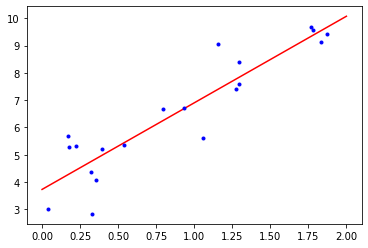

In [ ]:
# test prediction
test_X = np.array([[0], [2]])
test_X_b = np.c_[np.ones((2, 1)), test_X]
prediction = test_X_b.dot(params)
#print(prediction)
plt.plot(test_X, prediction, "r")
plt.plot(X, y, "b.")
plt.show()

In [ ]:
y_hat = X_b.dot(params)
error=((y_hat-y).T).dot(y_hat-y)
print(error) ## error(Theta)=error(params)


[[15.25842332]]


In [ ]:
loss=(y_hat-y)**2
cost=np.sum(loss)/(X.shape[1])
print(cost)  #Same as above

15.258423324591158
